> Игорь Сорочан DSU-31
# Домашнее задание `"Продвинутая оптимизация"`

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [18]:
import numpy as np
from scipy.optimize import differential_evolution, OptimizeResult
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# # comment the following lines to use interactive plotly graphics outside GitHub
import plotly.io as pio # to show Plotly plots on Github
pio.renderers.default = "svg"


%matplotlib inline

In [19]:
# comment the following lines to use interactive plotly graphics outside GitHub
# renderers to show Plotly plots on Github
# pio.renderers.default = "svg"
# pio.renderers

In [20]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
atol = 1e-8

In [21]:
result = differential_evolution(ackley, bounds, seed=42, atol= atol)#, popsize= 2, mutation= 1)

result

     fun: 4.920480467518473e-09
 message: 'Optimization terminated successfully.'
    nfev: 1563
     nit: 49
 success: True
       x: array([-6.67985667e-10, -1.60629510e-09])

### `Strategy`

In [22]:
### YOUR CODE HERE
lstats = {}
strategy = ['best1bin','rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp',\
    'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin' ]
for strat in strategy:
    n_iterations = []
    lstats.setdefault(strat, n_iterations)
    for kk in range(1):
        res = differential_evolution(ackley, strategy= strat, bounds= bounds, seed=42, atol= atol)
        if res.success == True:
            lstats[strat].append(res.nit)
        else:
            lstats[strat].append(0)
df= pd.DataFrame(lstats)

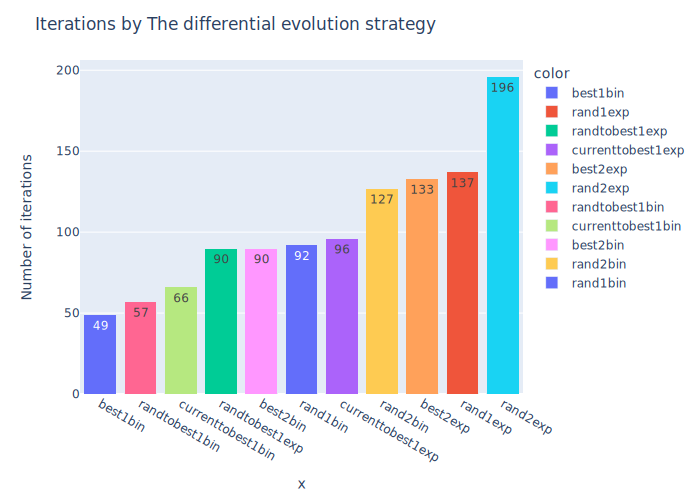

In [23]:
mybar = px.bar(x= df.columns, y= df.values.ravel(), color= df.columns, text_auto=True)
fig = go.Figure(mybar,
    layout=go.Layout(height=600, width=800)
)
fig.update_layout( barmode='stack', xaxis={'categoryorder':'total ascending'},)
fig.update_layout(title="Iterations by The differential evolution strategy ", yaxis_title="Number of iterations")
fig.show()
# fig.show(renderer="svg")

In [24]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'best1bin', atol= 1e-8)#, popsize= 2, mutation= 1)
result

     fun: 4.920480467518473e-09
 message: 'Optimization terminated successfully.'
    nfev: 1563
     nit: 49
 success: True
       x: array([-6.67985667e-10, -1.60629510e-09])

### `Popsize`

In [25]:
lstats = {}
strat = 'best1bin'

n_iterations = []
# lstats.setdefault(strat, n_iterations)
for kk in range(0,10):
    lstats.setdefault(kk,[])
    res = differential_evolution(ackley, strategy= strat, popsize= kk, bounds= bounds, seed=42, atol= 1e-8)
    if res.success == True:
        lstats[kk].append(res.nit)
    else:
        lstats[kk].append(0)
df= pd.DataFrame(lstats)

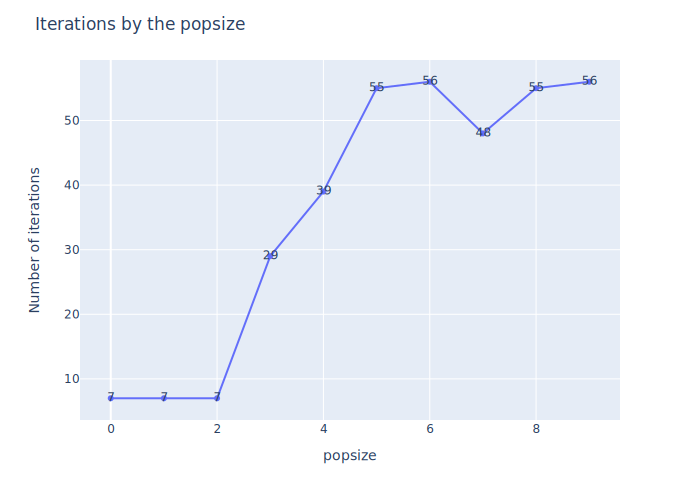

In [26]:
myline = px.line(x=df.columns, y= df.values.ravel(), text= df.values.ravel())
fig = go.Figure(myline,
    layout=go.Layout(height=600, width=800)
)
fig.update_layout(title="Iterations by the popsize ", yaxis_title="Number of iterations",
    xaxis_title = 'popsize')
fig.show()

In [27]:
result = differential_evolution(ackley, bounds, seed=42, strategy= 'best1bin', popsize= 2, atol= atol)#, mutation= 1)
result

     fun: 2.5799275570299014
     jac: array([-7.10542736e-07, -1.06581410e-06])
 message: 'Optimization terminated successfully.'
    nfev: 103
     nit: 7
 success: True
       x: array([-2.33199643e-08,  9.52166521e-01])

### `Mutation`

In [28]:
lstats = {}
strat = 'best1bin'
popsize = 2
n_iterations = []
# lstats.setdefault(strat, n_iterations)
for kk in np.arange(0,2,.1):
    lstats.setdefault(kk,[])
    res = differential_evolution(ackley, strategy= strat, popsize= popsize, mutation= kk, 
        bounds= bounds, seed=42, atol= 1e-8)
    if res.success == True:
        lstats[kk].append(res.nit)
    else:
        lstats[kk].append(0)
df= pd.DataFrame(lstats)

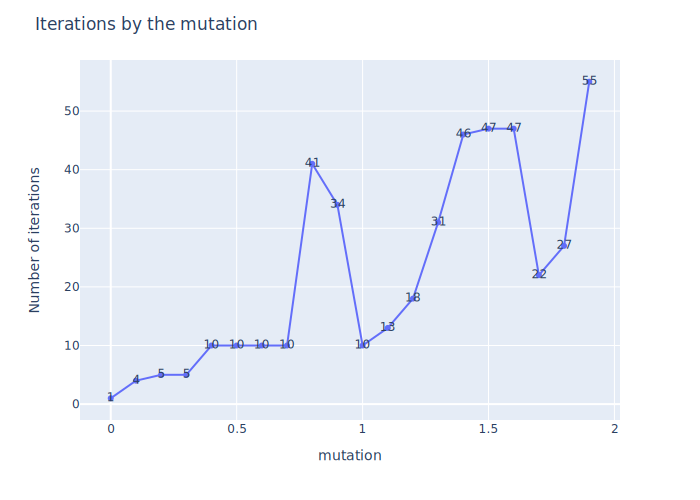

In [29]:
myline = px.line(x=df.columns, y= df.values.ravel(), text= df.values.ravel())
fig = go.Figure(myline,
    layout=go.Layout(height=600, width=800)
)
fig.update_layout(title="Iterations by the mutation ", yaxis_title="Number of iterations",
    xaxis_title = 'mutation')
fig.show()

### `Optimized solver parameters`

In [30]:
result = differential_evolution(ackley, bounds, seed=42, popsize= 2, mutation= 0, atol= atol)
result

     fun: 7.038850555686631
 message: 'Optimization terminated successfully.'
    nfev: 265
     nit: 1
 success: True
       x: array([-1.37592544, -1.37602192])

## ```nit: 49 -> 1, nfev: 1563 -> 265```

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [31]:
from scipy.optimize import minimize

x0 = [0,0]
tol = 1e-8

result_m = minimize(ackley, x0,  method='Nelder-Mead', tol= tol)
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-2.47092426e-09,  8.08893622e-10],
       [-4.85968376e-10,  3.10371891e-09]]), array([4.44089210e-16, 7.35379091e-09, 8.88560026e-09]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 34
        status: 0
       success: True
             x: array([0., 0.])

In [32]:
### YOUR CODE HERE
lstats = {}
# method = ['Nelder-Mead','Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',\
#     'TNC', 'COBYLA', 'SLSQP', 'trust-constr', 'dogleg' ]
method = ['Nelder-Mead','Powell', 'CG', 'BFGS', 'L-BFGS-B',\
    'TNC', 'SLSQP', 'trust-constr' ]  
for meth in method:
    # print(meth)
    n_iterations = []
    lstats.setdefault(meth, n_iterations)
    for kk in range(1):
        res = minimize(ackley, x0,  method= meth, tol= tol)
        if res.success == True:
            lstats[meth].append(res.nit)
        else:
            lstats[meth].append(0)
df= pd.DataFrame(lstats)

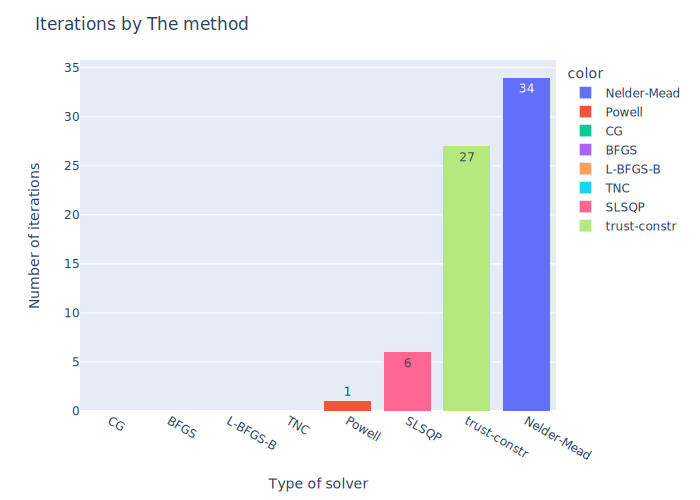

In [33]:
mybar = px.bar(x= df.columns, y= df.values.ravel(), color= df.columns, text_auto=True)
fig = go.Figure(mybar,
    layout=go.Layout(height=600, width=800)
)
fig.update_layout( barmode='stack', xaxis={'categoryorder':'total ascending'},)
fig.update_layout(title="Iterations by The method", yaxis_title="Number of iterations",
    xaxis_title = 'Type of solver')
fig.show()

In [34]:
result_m = minimize(ackley, x0,  method='Powell', tol= tol)
result_m

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
  status: 0
 success: True
       x: array([0., 0.])

## ```nit: 34 -> 1, nfev: 69 -> 63```

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
